In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Setup complete ✅ (4 CPUs, 25.5 GB RAM, 24.2/166.8 GB disk)


In [3]:
import os
os.makedirs('Products-Synth')

In [6]:
path_to_directory = '/content/'
!unzip '/content/gdrive/MyDrive/Data/Products-Synth.zip' -d '/content/Products-Synth'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: /content/Products-Synth/train/labels/img_04733.txt  
  inflating: /content/Products-Synth/train/labels/img_04734.txt  
  inflating: /content/Products-Synth/train/labels/img_04736.txt  
  inflating: /content/Products-Synth/train/labels/img_04737.txt  
  inflating: /content/Products-Synth/train/labels/img_04738.txt  
  inflating: /content/Products-Synth/train/labels/img_04739.txt  
  inflating: /content/Products-Synth/train/labels/img_04740.txt  
  inflating: /content/Products-Synth/train/labels/img_04741.txt  
  inflating: /content/Products-Synth/train/labels/img_04743.txt  
  inflating: /content/Products-Synth/train/labels/img_04745.txt  
  inflating: /content/Products-Synth/train/labels/img_04748.txt  
  inflating: /content/Products-Synth/train/labels/img_04750.txt  
  inflating: /content/Products-Synth/train/labels/img_04751.txt  
  inflating: /content/Products-Synth/train/labels/img_04752.txt  
  inflating: /conte

In [7]:
!yolo mode=train model=yolov8n.pt data=/content/Products-Synth/coco128.yaml epochs=50 imgsz=640 seed = 123 device=0

100% 6.23M/6.23M [00:00<00:00, 202MB/s]
Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Products-Synth/coco128.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=123, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format

In [8]:
!yolo mode = val model = /content/runs/detect/train/weights/best.pt data=/content/Products-Synth/coco128.yaml conf = 0.25 imgsz=640 split = test device=0

Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/Products-Synth/test/labels... 1187 images, 16 backgrounds, 0 corrupt: 100% 1187/1187 [00:00<00:00, 1607.49it/s]
val: New cache created: /content/Products-Synth/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 75/75 [00:14<00:00,  5.21it/s]
                   all       1187       1646       0.96      0.963      0.976      0.874
Speed: 0.3ms preprocess, 2.6ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val


In [14]:
!yolo mode = predict model = /content/runs/detect/train/weights/best.pt source = '/content/Products-Synth/test/images/img_00054.jpg'

Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

image 1/1 /content/Products-Synth/test/images/img_00054.jpg: 512x640 1 date, 58.2ms
Speed: 7.8ms preprocess, 58.2ms inference, 115.6ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict


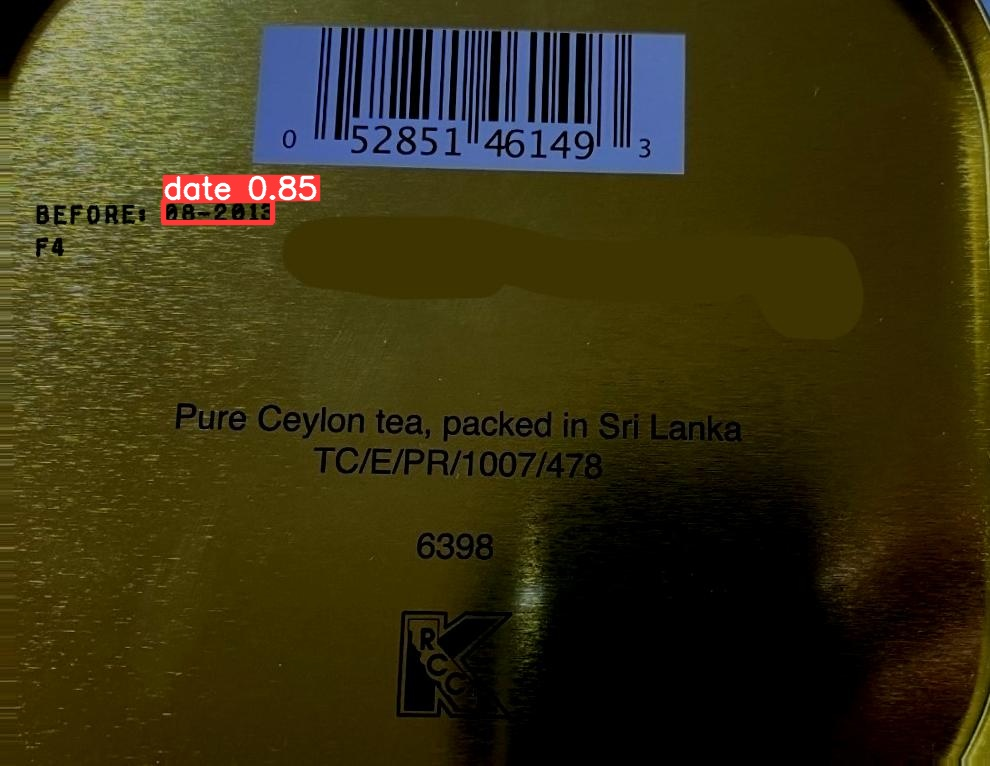

In [15]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread('/content/runs/detect/predict/img_00054.jpg')
cv2_imshow(img)

In [11]:
!yolo export model=/content/runs/detect/train/weights/best.pt format=onnx  # export official model
!yolo export model=/content/runs/detect/train/weights/best.pt format=saved_model # export custom trained model


Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

PyTorch: starting from /content/runs/detect/train/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 217.6 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.7s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.14.0 opset 17...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 6.4s, saved as /content/runs/detect/train/weights/best.onnx (11.7 MB)

Export complete (6.8s)
Results saved to /co

In [12]:
!yolo export model=/content/runs/detect/train/weights/best.pt format=tfjs

Ultralytics YOLOv8.0.131 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients

PyTorch: starting from /content/runs/detect/train/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (5.9 MB)

TensorFlow SavedModel: starting export with tensorflow 2.12.0...

ONNX: starting export with onnx 1.14.0 opset 17...
============= Diagnostic Run torch.onnx.export version 2.0.1+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: simplifying with onnxsim 0.4.33...
ONNX: export success ✅ 3.8s, saved as /content/runs/detect/train/weights/best.onnx (11.6 MB)

TensorFlow SavedModel: running 'onnx2tf -i /content/runs/detect/train/weights/best.onnx -o /content/runs/detect/train/weights/best_saved_model -nuo --non_verbose'
2023-07-08 23:26:35.520158: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed c

In [13]:
%cp -r /content/runs/detect /content/gdrive/MyDrive/YOLO/